<a href="https://colab.research.google.com/github/heysourin/Machine-Learning-Projects/blob/main/Decision%20Tree/decision_tree_prepruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()

In [37]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
X = df.iloc[:,:-1]
y = df['target']

In [39]:
X.shape, y.shape

((150, 4), (150,))

In [40]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier()

In [44]:
treemodel.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 4.95\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 3.9\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.35714285714285715, 'x[1] <= 2.25\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.4166666666666667, 0.21428571428571427, 'x[2] <= 4.5\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),

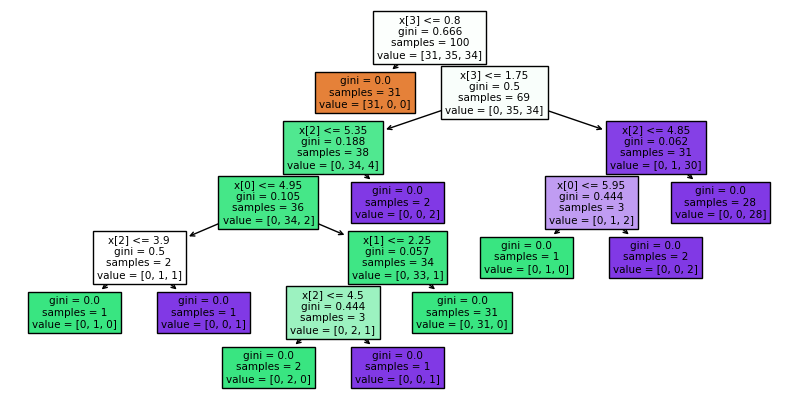

In [45]:
from sklearn import tree
plt.figure(figsize=(10,5))
tree.plot_tree(treemodel, filled=True)

In [46]:
y_pred = treemodel.predict(X_test)

In [47]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.98

## **Preprunning using GrisSearchCV**

- GridSearchCV (Grid Search Cross-Validation) is a technique used for hyperparameter tuning in machine learning models.


In [58]:
parameter={
'criterion': ['gini', 'entropy', 'log_loss'],
'splitter': ['best', ' random'],
'max_depth' : [1, 2, 3,4, 5],
'max_features': ['auto', 'sart', 'log2']
# 'ccp_alpha':  [1, 2, 3, 4, 5, 6, 7]
}

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
treemodel=DecisionTreeClassifier()
cv = GridSearchCV(treemodel, param_grid=parameter, cv=5, scoring='accuracy')

In [61]:
cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sart', 'log2'],
                         'splitter': ['best', ' random']},
             scoring='accuracy')

In [62]:
cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [63]:
y_pred = cv.predict(X_test)

In [64]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [71]:
np.array(y_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.98